In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Coleta de dados

In [3]:
anuncios= pd.read_csv('advertising.csv')

In [4]:
anuncios.head()

tempo_diario_site  idade  renda_media_regiao  tempo_medio_internet  \
0              68.95     35            61833.90                256.09   
1              80.23     31            68441.85                193.77   
2              69.47     26            59785.94                236.50   
3              74.15     29            54806.18                245.89   
4              68.37     35            73889.99                225.58   

                                  titulo          cidade  sexo        pais  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

      timestamp_clique  clique  
0  2016-03-27 00:53:11       0  
1  2016-04-04 01:39:02       0  
2  2016-03-13 20:35:42       0  
3  2016-01-10 02:31:19       0  
4  2016-06-03 03:36:18       0

In [5]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_diario_site     1000 non-null   float64
 1   idade                 1000 non-null   int64  
 2   renda_media_regiao    1000 non-null   float64
 3   tempo_medio_internet  1000 non-null   float64
 4   titulo                1000 non-null   object 
 5   cidade                1000 non-null   object 
 6   sexo                  1000 non-null   int64  
 7   pais                  1000 non-null   object 
 8   timestamp_clique      1000 non-null   object 
 9   clique                1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 37.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=d20066e5f12b51af28a0ba843f8009234e06b7d2cb8428f10cf4d66ce47d2dfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-oko0a2vx/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=f1c1030a86c44cfcca4a56bb9f5254240e516df47da28e2e7954350b9a14af27
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5

In [7]:
from pandas_profiling import ProfileReport

<ipython-input-7-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [8]:
relatorio= ProfileReport(anuncios,title='Relátorio dos anúncios')
relatorio.to_file('relatorio_dos_anucnios_v1.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
relatorio

In [10]:
anuncios.timestamp_clique

0      2016-03-27 00:53:11
1      2016-04-04 01:39:02
2      2016-03-13 20:35:42
3      2016-01-10 02:31:19
4      2016-06-03 03:36:18
              ...         
995    2016-02-11 21:49:00
996    2016-04-22 02:07:01
997    2016-02-01 17:24:57
998    2016-03-24 02:35:54
999    2016-06-03 21:43:21
Name: timestamp_clique, Length: 1000, dtype: object

In [11]:
anuncios.timestamp_clique=pd.to_datetime(anuncios['timestamp_clique'])

In [ ]:
anuncios['ano']=['anuncios.timestamp_clique'].dt.year
anuncios['mes']=['anuncios.timestamp_clique'].dt.month
anuncios['day']=['anuncios.timestamp_clique'].dt.day

Text(0.5, 0, 'idade')

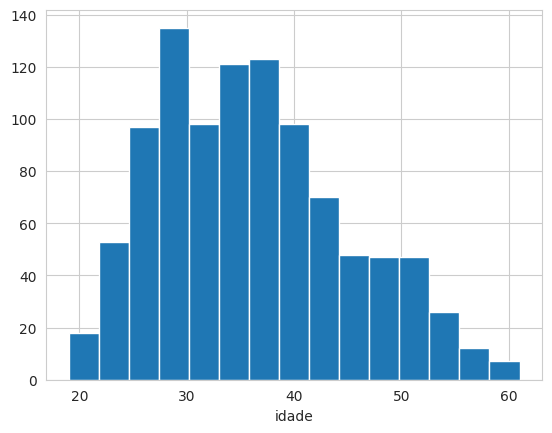

In [12]:
#idade dos clientes
sns.set_style('whitegrid')
anuncios['idade'].hist(bins=15)
plt.xlabel('idade')

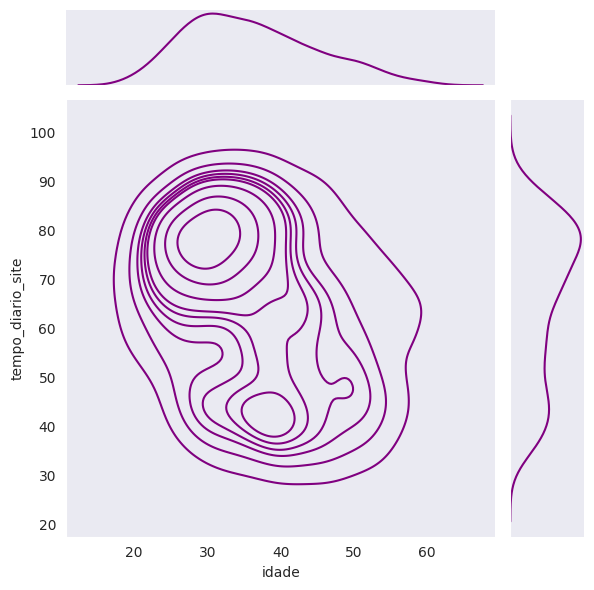

In [15]:
sns.set_style('dark')
sns.jointplot(x='idade',y='tempo_diario_site',data=anuncios,kind='kde',color='purple')

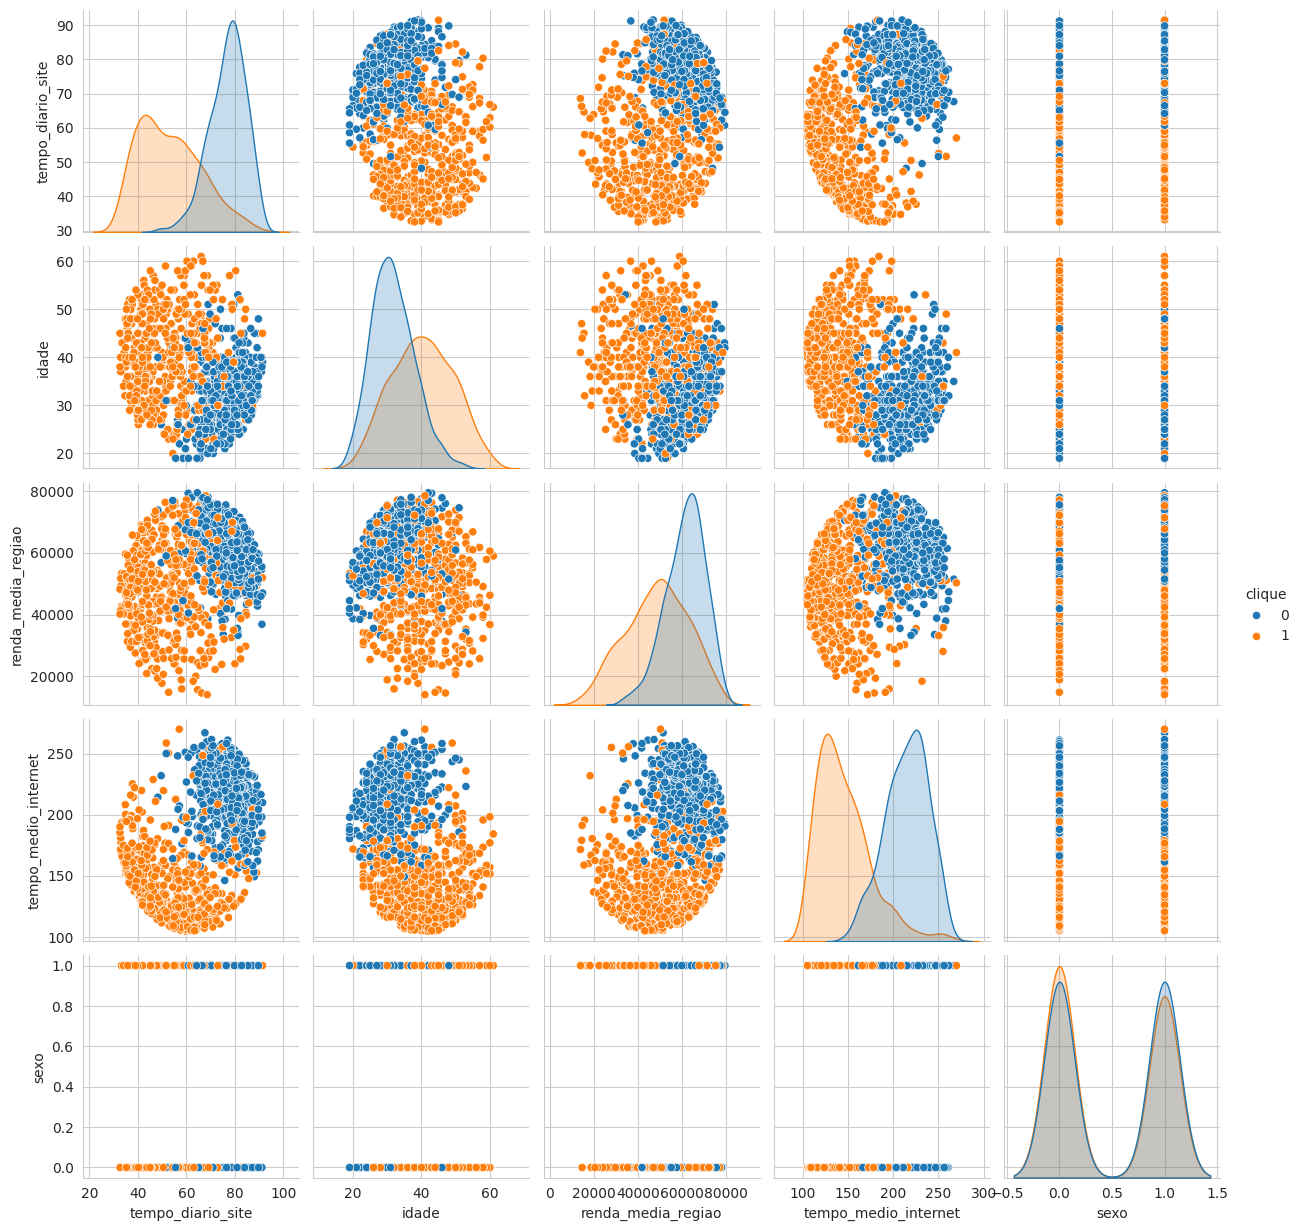

In [13]:
#consumidores que mais clicam no site
sns.pairplot(anuncios,hue='clique')

#criando modelo de regressão

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [17]:
anuncios.columns

Index(['tempo_diario_site', 'idade', 'renda_media_regiao',
       'tempo_medio_internet', 'titulo', 'cidade', 'sexo', 'pais',
       'timestamp_clique', 'clique'],
      dtype='object')

In [18]:
X=anuncios[['tempo_diario_site','idade','tempo_medio_internet']]
y=anuncios['clique']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
logmodel=LogisticRegression()
#treinando o modelo
logmodel.fit(X_train, y_train)

LogisticRegression()

#previsões

In [29]:
ý_test=logmodel.predict(X_test)

In [30]:
accuracy_score(y_test,ý_test)

0.9454545454545454

In [ ]:
#modelo mt sensivel a entrada dos dados, se tivesse sido adicionado outra variavel o modelo poderia ter piorado